
# Additional Spatial Analysis Methods: Point Patterns



## Libraries

In [1]:
!pip install pysal

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# for basemaps
import contextily as ctx

# to import data from LA Data portal
from sodapy import Socrata

# data viz!
import seaborn as sns

import plotly.express as px

from pointpats import centrography

In [3]:
sns.__version__

'0.10.1'

## Arrest Data

In [4]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "arst_date between '2020-03-01T00:00:00' and '2020-10-30T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)


In [5]:
# convert pandas dataframe to geodataframe
arrests = gpd.GeoDataFrame(arrests, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(arrests.lon, arrests.lat))

In [6]:
# convert lat/lon to floats
arrests.lon = arrests.lon.astype('float')
arrests.lat = arrests.lat.astype('float')
arrests.age = arrests.age.astype('int')

In [7]:
# drop the unmapped rows
arrests.drop(arrests[arrests.lon==0].index,inplace=True)

In [8]:
arrests=arrests[['arst_date','area_desc','age','sex_cd','descent_cd','grp_description','geometry']]

In [9]:
arrests.columns = ['date','area','age','sex','race','crime','geometry']

In [10]:
# project to web mercator
arrests=arrests.to_crs('EPSG:3857')

## Heat maps
This lab will focus on visualing point densities in a variety of ways. Before we begin, let's have a look at the arrest data in its "raw" format, by simply creating a point map: a single point for its given location on a grid.

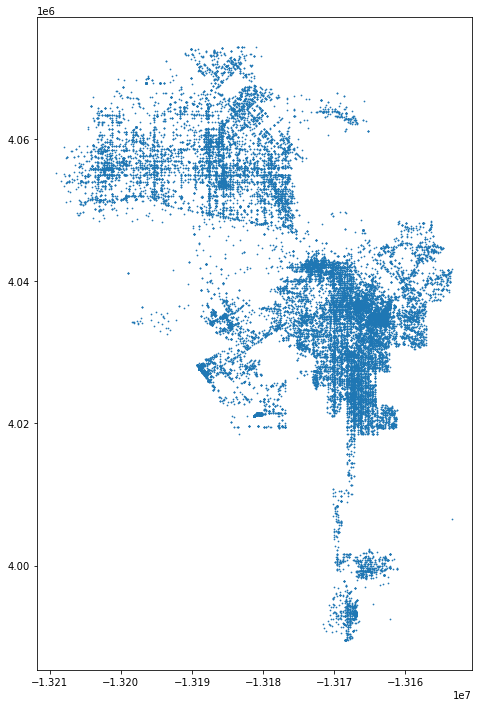

In [11]:
arrests.plot(figsize=(12,12),
             markersize=0.5)

The resulting plot tells us a lot about the data we have imported into the notebook. The overall shape, if you are familiar with Los Angeles, gives a sense of the physical space that is defined by the city boundary. The divided city, from the "valley" in the northwest, the Santa Monica Mountains that divide that north with the Westside, highlighted by the empty rectangle that is Santa Monica, and the blob in center right that defines the contours of downtown Los Angeles, accentuated by the pathway to the port heading south towards Long Beach. And through this cacophony of points, we can begin to detect point patterns that delineate streets and certain neighborhoods appear to be more concentrated than others. As much as the blue dots represent actual data points, the absence of their presence also informs

To begin with our exploration on point patterns,

## Interactive exploration

Jupyter notebooks comes with the ability for interactive coding. By "interactive" we mean to say that it utilizes the interactive features of the web, allowing users to use dropdowns and sliders to manipulate the output.

In [12]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [13]:
arrests.crime.value_counts()

Miscellaneous Other Violations    5365
Aggravated Assault                4835
Driving Under Influence           3336
Other Assaults                    3318
Narcotic Drug Laws                3190
Vehicle Theft                     2082
Weapon (carry/poss)               1784
Burglary                          1459
Robbery                           1253
Larceny                           1012
Prostitution/Allied                945
Drunkeness                         826
Moving Traffic Violations          804
Liquor Laws                        693
Against Family/Child               492
Gambling                           349
Sex (except rape/prst)             307
Fraud/Embezzlement                 281
Receive Stolen Property            216
Disorderly Conduct                 162
Rape                               138
Homicide                           130
Forgery/Counterfeit                109
Non-Criminal Detention             106
Disturbing the Peace                20
Pre-Delinquency          

In [14]:
arrests[arrests.crime == 'Driving Under Influence'].head()

date         area  age sex race  \
7   2020-09-26T00:00:00.000  77th Street   34   M    B   
8   2020-09-26T00:00:00.000     Foothill   29   M    H   
9   2020-09-26T00:00:00.000     Van Nuys   39   M    H   
18  2020-09-26T00:00:00.000     Van Nuys   31   M    W   
21  2020-09-26T00:00:00.000       Harbor   50   F    W   

                      crime                           geometry  
7   Driving Under Influence  POINT (-13167014.086 4025405.360)  
8   Driving Under Influence  POINT (-13180661.856 4059067.654)  
9   Driving Under Influence  POINT (-13184257.475 4054867.870)  
18  Driving Under Influence  POINT (-13181763.919 4049983.538)  
21  Driving Under Influence  POINT (-13167069.746 3992805.765)

date         area  age sex race  \
7   2020-09-26T00:00:00.000  77th Street   34   M    B   
8   2020-09-26T00:00:00.000     Foothill   29   M    H   
9   2020-09-26T00:00:00.000     Van Nuys   39   M    H   
18  2020-09-26T00:00:00.000     Van Nuys   31   M    W   
21  2020-09-26T00:00:00.000       Harbor   50   F    W   

                      crime                           geometry  
7   Driving Under Influence  POINT (-13167014.086 4025405.360)  
8   Driving Under Influence  POINT (-13180661.856 4059067.654)  
9   Driving Under Influence  POINT (-13184257.475 4054867.870)  
18  Driving Under Influence  POINT (-13181763.919 4049983.538)  
21  Driving Under Influence  POINT (-13167069.746 3992805.765)

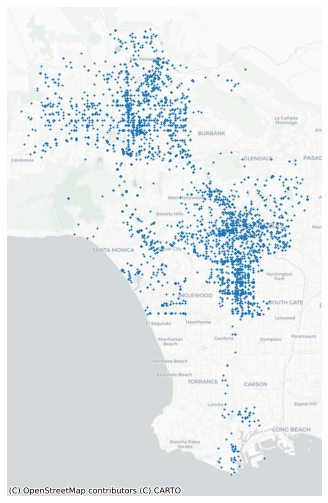

In [20]:
# use display instead of print if it is not the last output in a cell
display(arrests[arrests.crime == 'Driving Under Influence'].head()) 

# a regular filtered data output
ax = arrests[arrests.crime == 'Driving Under Influence'].plot(figsize=(9,9), markersize=1)
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [29]:
# create a function
def arrests_by(crime='Driving Under Influence'):
    # use display instead of print if it is not the last output in a cell
    display(arrests[arrests.crime == crime].head()) 

    # a regular filtered data output
    ax = arrests[arrests.crime == crime].plot(figsize=(9,9), markersize=2)
    ax.axis('off')
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

date         area  age sex race          crime  \
42   2020-09-25T00:00:00.000   Hollenbeck   40   F    W  Vehicle Theft   
119  2020-09-24T00:00:00.000      Olympic   28   M    H  Vehicle Theft   
154  2020-09-24T00:00:00.000      Rampart   26   F    H  Vehicle Theft   
197  2020-09-24T00:00:00.000      Rampart   27   F    H  Vehicle Theft   
198  2020-09-24T00:00:00.000  77th Street   37   M    B  Vehicle Theft   

                              geometry  
42   POINT (-13160501.896 4039092.178)  
119  POINT (-13171266.491 4038635.238)  
154  POINT (-13169017.837 4040032.995)  
197  POINT (-13166858.239 4036552.360)  
198  POINT (-13170086.504 4028144.095)

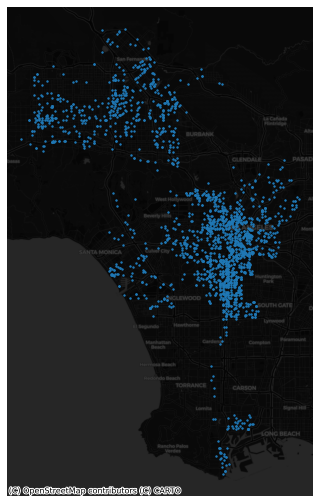

In [30]:
arrests_by('Vehicle Theft')

Next, we use an interactive feature to create a drop down for our function.

In [31]:
@interact
def arrests_by(crime=arrests.crime.unique().tolist()):
    # use display instead of print if it is not the last output in a cell
    display(arrests[arrests.crime == crime].head()) 

    # a regular filtered data output
    ax = arrests[arrests.crime == crime].plot(figsize=(9,9), markersize=2)
    ax.axis('off')
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='crime', options=('Narcotic Drug Laws', 'Miscellaneous Other Violat…

In [33]:
@interact
def arrests_by(crime=arrests.crime.unique().tolist(),
               area=arrests['area'].unique().tolist()):
    # use display instead of print if it is not the last output in a cell
    display(arrests[(arrests.crime == crime) & (arrests['area'] == area)].head()) 

    # a regular filtered data output
    ax = arrests[(arrests.crime == crime) & (arrests['area'] == area)].plot(figsize=(9,9), markersize=4)
    ax.axis('off')
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='crime', options=('Narcotic Drug Laws', 'Miscellaneous Other Violat…

## Seaborn Plots
> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

-https://seaborn.pydata.org/

In [ ]:
# we'll work in Web Mercator
arrests = arrests.to_crs('EPSG:3857')

In [41]:
# need an x and y column
arrests['x'] = arrests.geometry.x
arrests['y'] = arrests.geometry.y

In [42]:
arrests.head()

date         area  age sex race  \
0  2020-09-26T00:00:00.000      Rampart   29   M    B   
1  2020-09-26T00:00:00.000      Pacific   26   M    B   
2  2020-09-26T00:00:00.000     Wilshire   53   M    W   
3  2020-09-26T00:00:00.000  N Hollywood   41   M    H   
4  2020-09-26T00:00:00.000      Central   19   M    W   

                            crime                           geometry  \
0              Narcotic Drug Laws  POINT (-13165288.634 4035719.316)   
1              Narcotic Drug Laws  POINT (-13181285.245 4021016.699)   
2  Miscellaneous Other Violations  POINT (-13175140.409 4040046.436)   
3             Weapon (carry/poss)  POINT (-13180806.571 4052432.169)   
4       Moving Traffic Violations  POINT (-13164320.155 4034577.338)   

              x             y  
0 -1.316529e+07  4.035719e+06  
1 -1.318129e+07  4.021017e+06  
2 -1.317514e+07  4.040046e+06  
3 -1.318081e+07  4.052432e+06  
4 -1.316432e+07  4.034577e+06

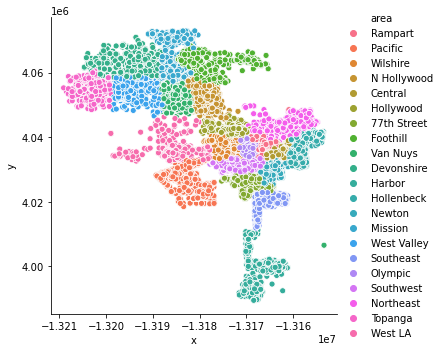

In [43]:
sns.relplot(data=arrests,
            x='x', 
            y='y',
            hue='area')

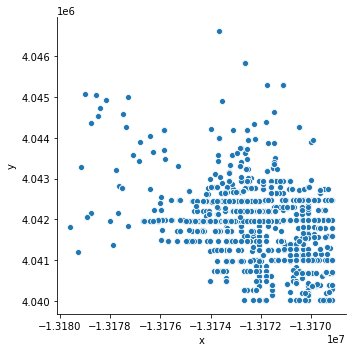

In [47]:
sns.relplot(data=arrests[arrests['area']=='Hollywood'],
            x='x', 
            y='y')

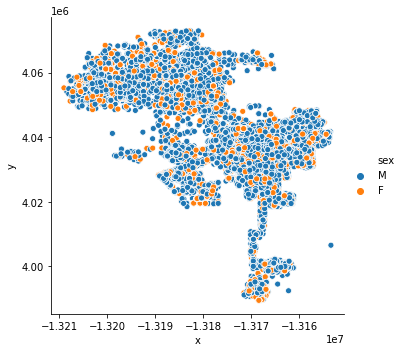

In [48]:
sns.relplot(data=arrests,
            x='x', 
            y='y',
            hue='sex')

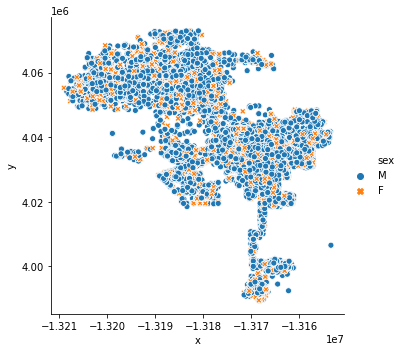

In [49]:
sns.relplot(data=arrests,
            x='x', 
            y='y',
            hue='sex',
            style='sex')

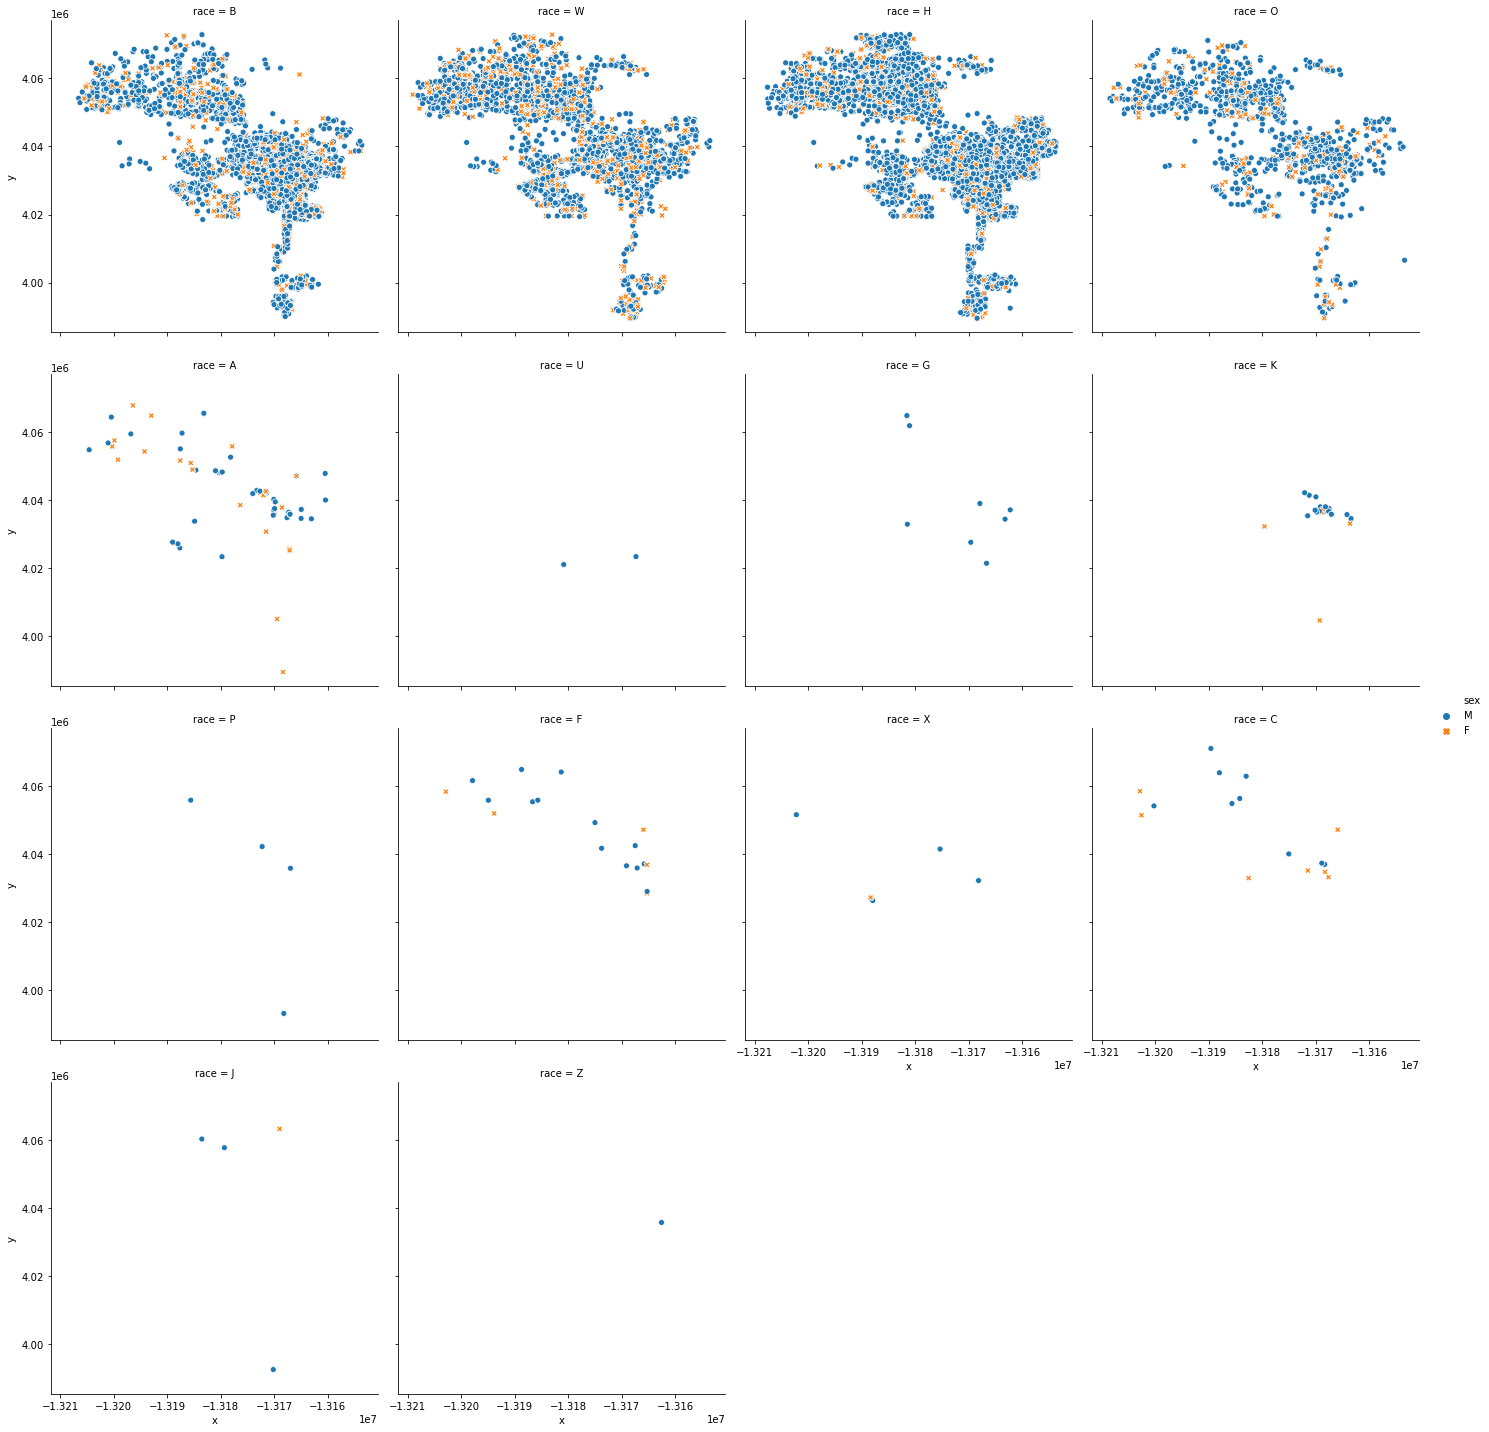

In [50]:
sns.relplot(data=arrests,
            x='x', 
            y='y',
            hue='sex',
            style='sex',
            col='race',
            col_wrap=4)

## Distribution plots

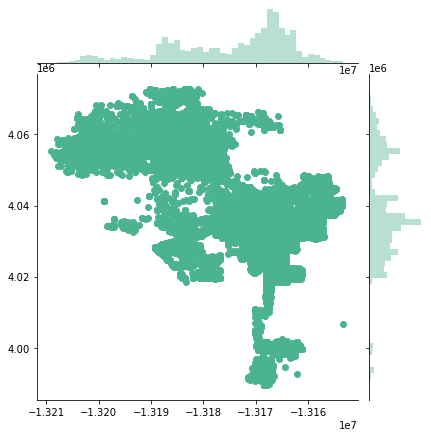

In [51]:
sns.jointplot(x=arrests.geometry.x, 
              y=arrests.geometry.y, 
              kind="scatter", 
              color="#4CB391")

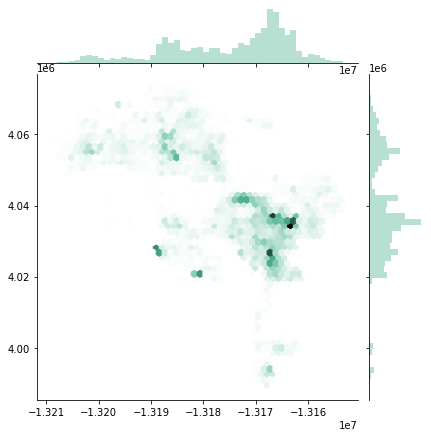

In [52]:
sns.jointplot(x=arrests.geometry.x, 
              y=arrests.geometry.y, 
              kind="hex", 
              color="#4CB391")

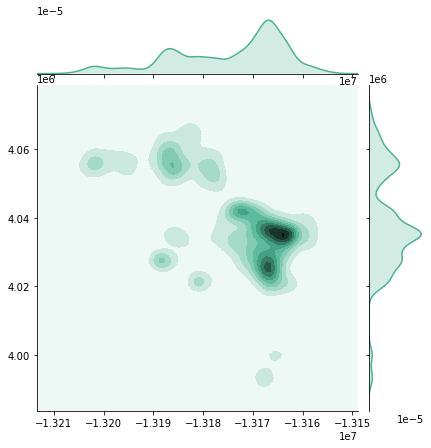

In [53]:
sns.jointplot(x=arrests.geometry.x, 
              y=arrests.geometry.y, 
              kind="kde", 
              color="#4CB391")

## Heatmap

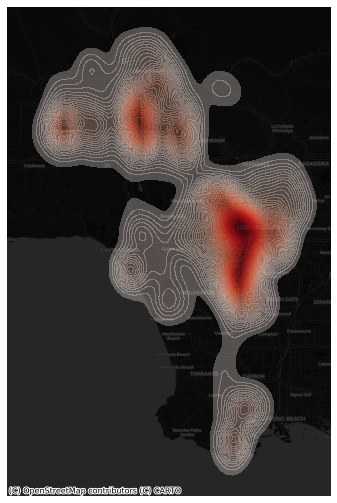

In [55]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(arrests[arrests.race=='H'].x, 
                arrests[arrests.race=='H'].y,
                n_levels=100, 
                shade=True,
                shade_lowest=False,
                alpha=0.3, 
                cmap='Reds')

# Remove axes
ax.set_axis_off()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

## Centrography

In [56]:
# create new columns for x and y values from the geometry column
arrests['x'] = arrests.geometry.x
arrests['y'] = arrests.geometry.y

In [57]:
# compute the mean and median centers
mean_center = centrography.mean_center(arrests[['x','y']])
med_center = centrography.euclidean_median(arrests[['x','y']])

In [58]:
print(mean_center[1])

4038619.158142715


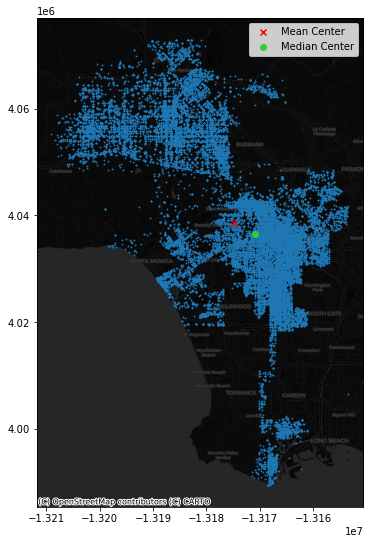

In [59]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(arrests['x'], arrests['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
# Display
plt.show()

In [60]:
centrography.std_distance(arrests[['x','y']])

18948.762986814436

In [61]:
major, minor, rotation = centrography.ellipse(arrests[['x','y']])

In [62]:
from matplotlib.patches import Ellipse
import numpy

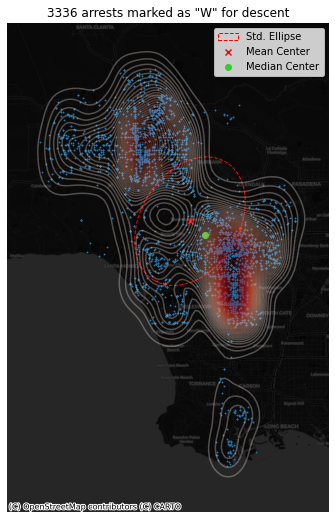

In [65]:
# filter the data by race
crime = 'Driving Under Influence'
arrests_filtered = arrests[arrests.crime == crime]

# mean center and median
mean_center = centrography.mean_center(arrests_filtered[['x','y']])
med_center = centrography.euclidean_median(arrests_filtered[['x','y']])

# standard ellipse
major, minor, rotation = centrography.ellipse(arrests_filtered[['x','y']])

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# plot arrest points
ax.scatter(arrests_filtered['x'], arrests_filtered['y'], s=0.75)

# add the mean and median center points
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# heatmap
sns.kdeplot(arrests_filtered.geometry.x, arrests_filtered.geometry.y,
                n_levels=50, shade=False,shade_lowest=False,
                alpha=0.3, cmap='Reds', ax=ax)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse db_filtered
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('Off')

ax.set_title(str(len(arrests_filtered)) + ' arrests marked as "' + race + '" for descent')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
# Display
plt.show()

In [70]:
@interact
def arrest_ellipse_crime(crime=arrests.crime.unique().tolist()):
    # filter the data by crime
    arrests_filtered = arrests[arrests.crime == crime]

    # mean center and median
    mean_center = centrography.mean_center(arrests_filtered[['x','y']])
    med_center = centrography.euclidean_median(arrests_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(arrests_filtered[['x','y']])

    # Set up figure and axis
    fig, ax = plt.subplots(1, figsize=(9, 9))

    # Plot arrest points
    ax.scatter(arrests_filtered['x'], arrests_filtered['y'], s=1)
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(arrests_filtered.geometry.x, arrests_filtered.geometry.y,
                    n_levels=50, shade=False,shade_lowest=False,
                    alpha=0.3, cmap='Reds', ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')
    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(arrests_filtered)) + ' arrests for "' + str(crime) + '"')
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
    # Display
#     plt.show()
    
#     return fig

interactive(children=(Dropdown(description='crime', options=('Narcotic Drug Laws', 'Miscellaneous Other Violat…

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
<ipython-input-70-34a6bb445f6e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(9, 9))
<ipython-input-70-34a6bb445f6e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(9, 9))
<ipython-input-70-34a6bb445f6e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created th

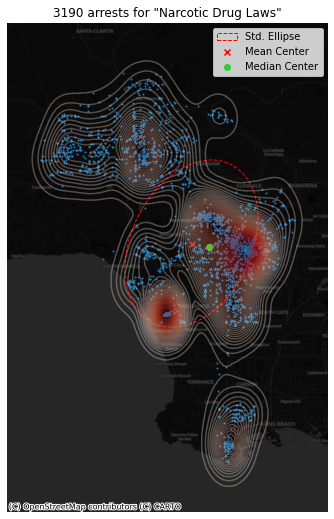

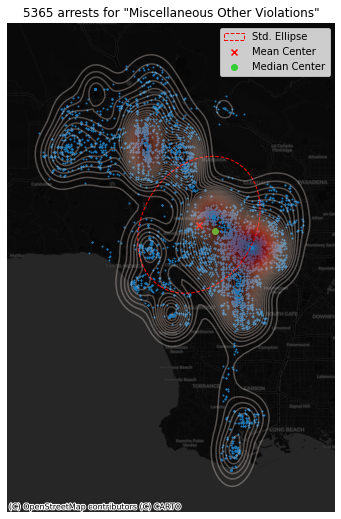

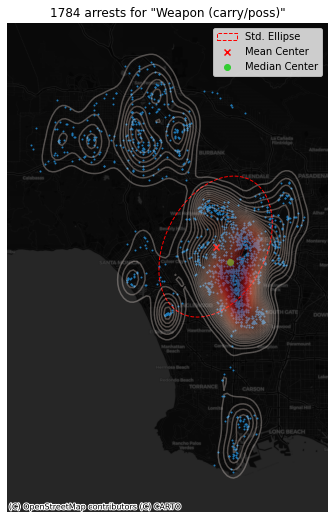

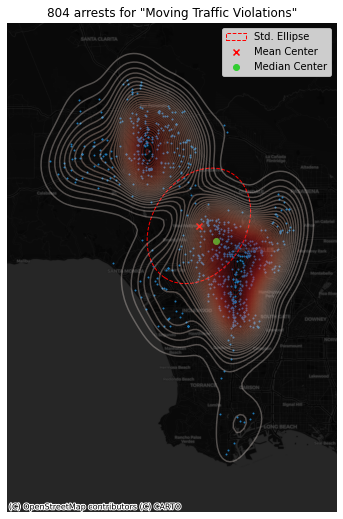

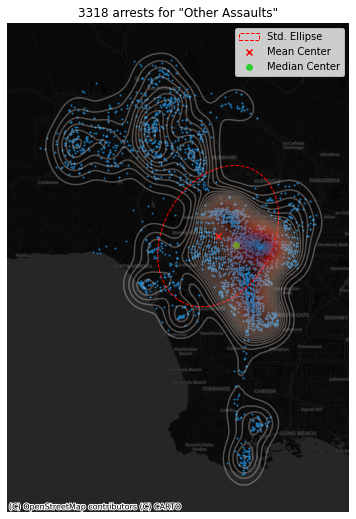

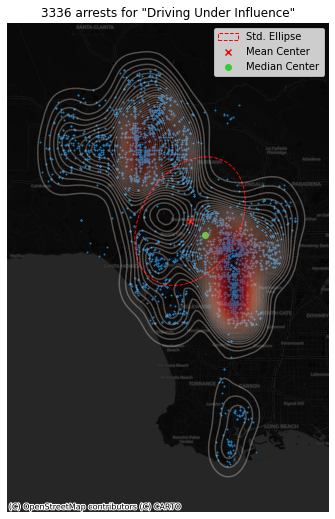

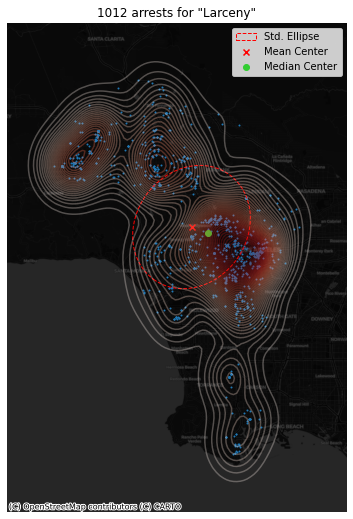

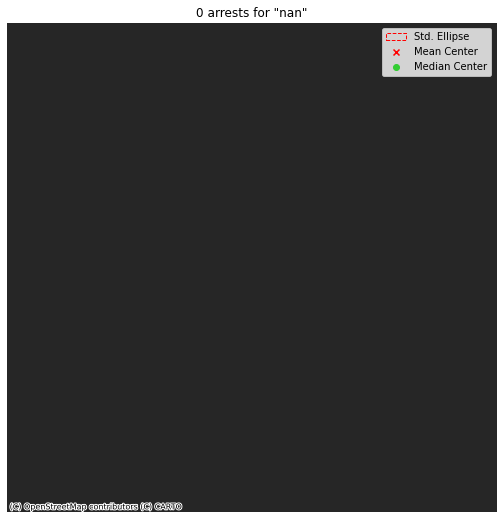

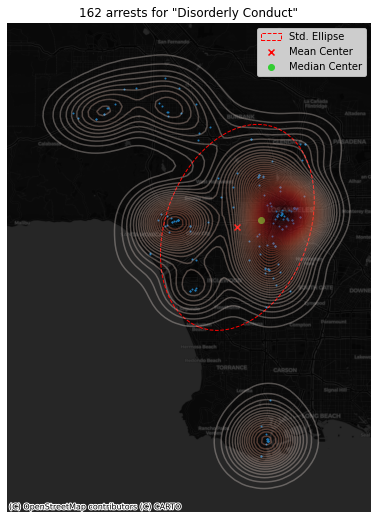

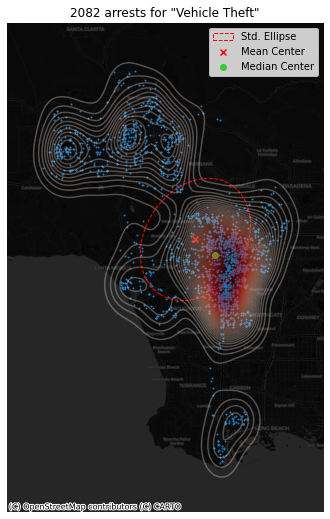

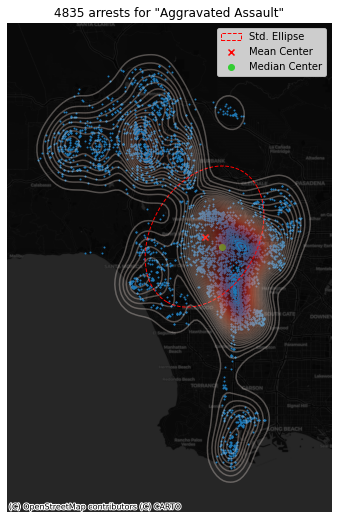

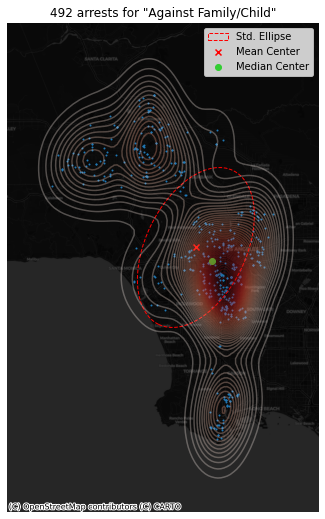

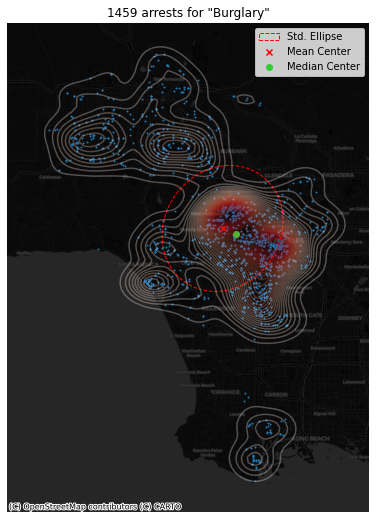

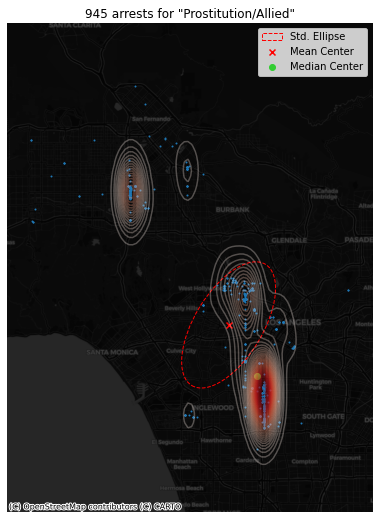

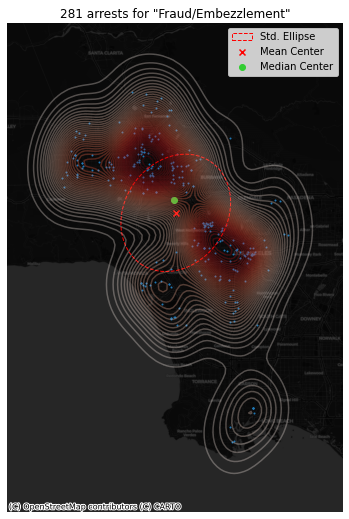

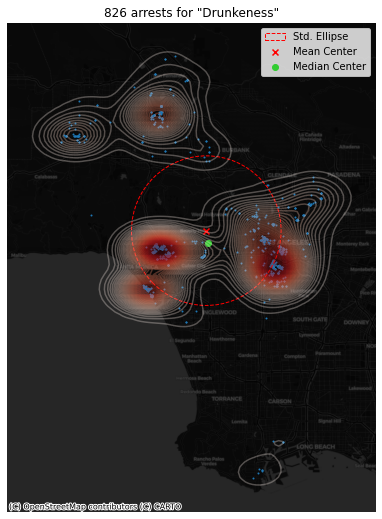

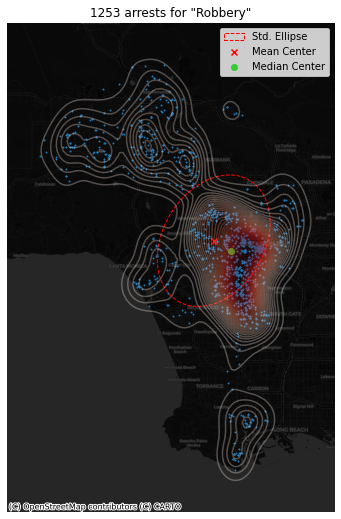

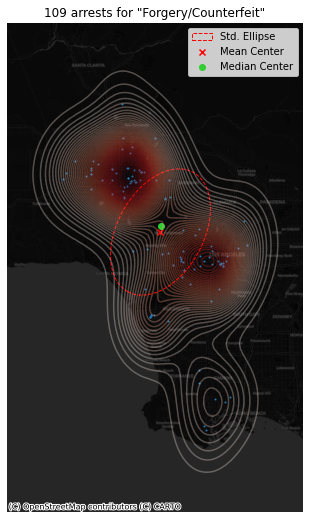

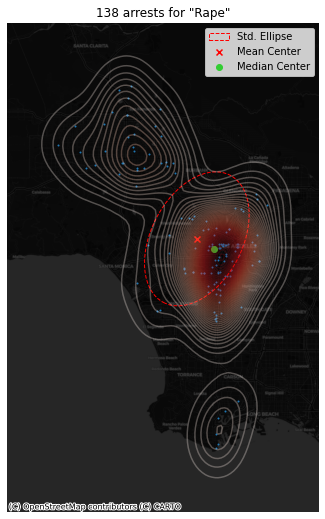

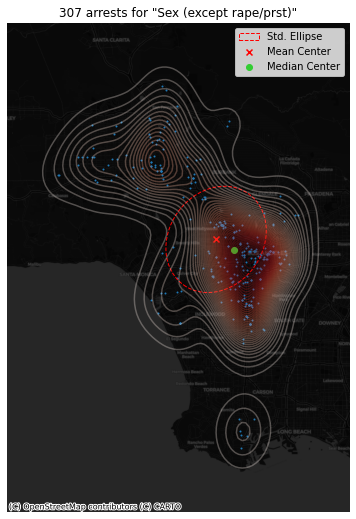

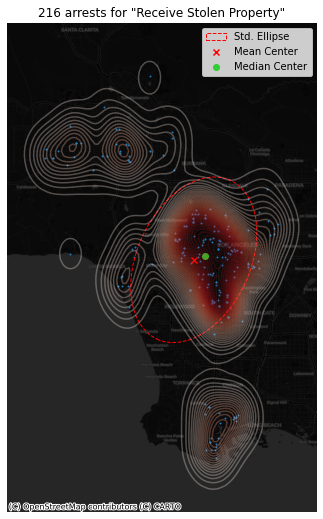

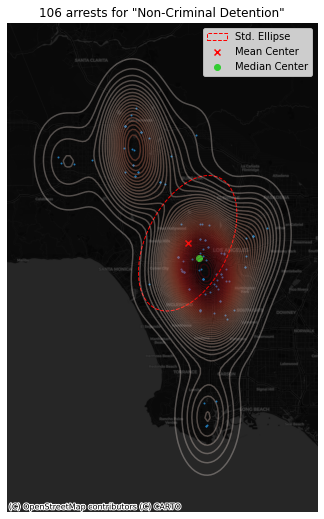

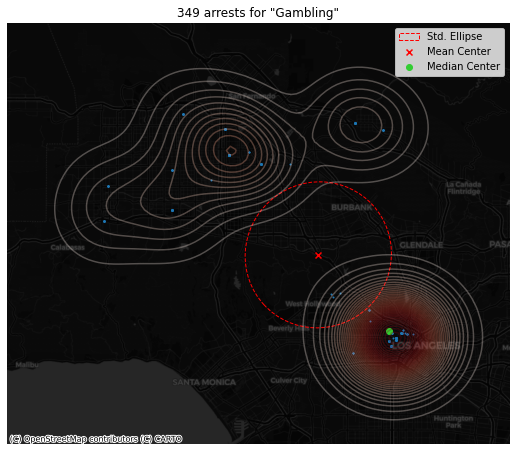

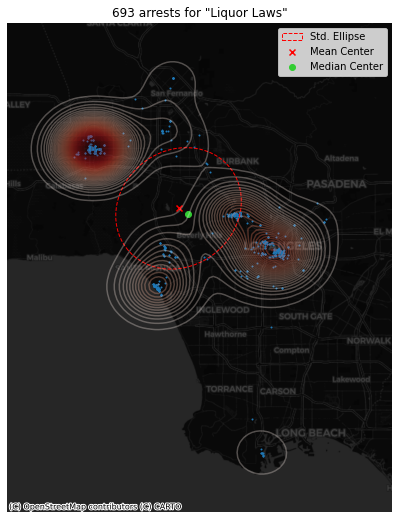

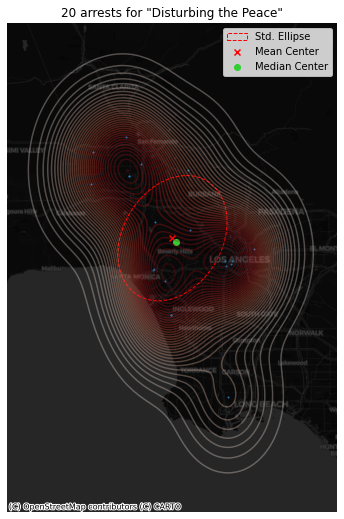

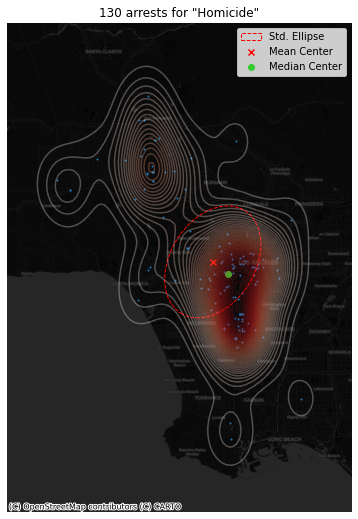

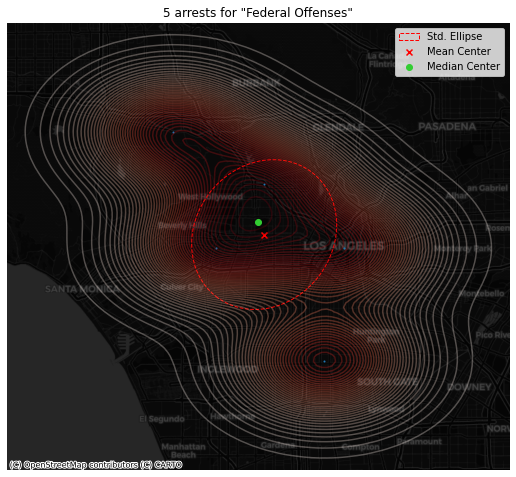

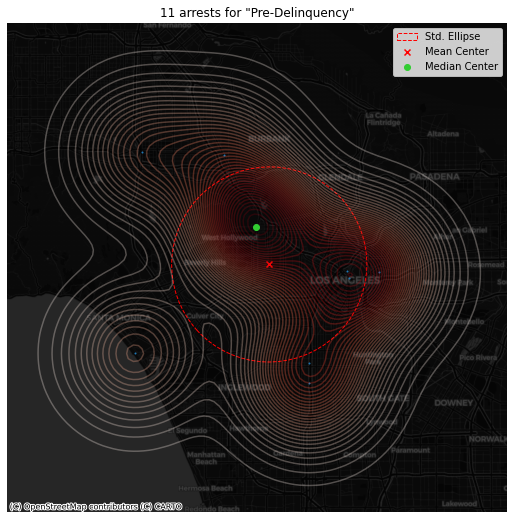

In [71]:
crimes=arrests.crime.unique().tolist()
for crime in crimes:
    arrest_ellipse_crime(crime)